<a href="https://colab.research.google.com/github/JohannesKarwou/notebooks/blob/main/freeSolvSummary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
! pip install sketch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [205]:
import sketch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [206]:
sns.set_theme(style='white', rc={'figure.figsize': (12,12),'axes.unicode_minus': False,'axes.labelsize': 30.0, 'font.size': 65, 'legend.fontsize': 25, 'lines.markersize': 20,'xtick.labelsize': 30,'ytick.labelsize': 30, 'xtick.bottom': True, 'xtick.direction': 'in', 'ytick.left': True, 'ytick.direction': 'in',})

In [207]:
data = pd.read_csv("https://raw.githubusercontent.com/JohannesKarwou/notebooks/main/data/finalOverview.csv")

In [208]:
def plotting_grey_area(i, one_plot = False):
    # shaded grey area   
    if one_plot:
      x = np.linspace(-30,20,5)
      y = x
      axs.plot(x, y, alpha = 0.9, color = 'C7',linestyle='dashed')
      y2 = x +1
      axs.plot(x, y2, alpha = 0.3, color = 'C7',linestyle='dashed')
      y3 = x -1 
      axs.plot(x, y3, alpha = 0.3, color = 'C7',linestyle='dashed')
      axs.fill_between(x,y2,y3, alpha = 0.3, color = 'Grey')

      x = np.linspace(-30,20,5)
      y = x
      axs.plot(x, y, alpha = 0.9, color = 'C7',linestyle='dashed')
      y2 = x +2
      axs.plot(x, y2, alpha = 0.3, color = 'C7',linestyle='dashed')
      y3 = x -2 
      axs.plot(x, y3, alpha = 0.3, color = 'C7',linestyle='dashed')
      axs.fill_between(x,y2,y3, alpha = 0.3, color = 'Grey')
    else:
      x = np.linspace(-30,20,5)
      y = x
      axs[i].plot(x, y, alpha = 0.9, color = 'C7',linestyle='dashed')
      y2 = x +1
      axs[i].plot(x, y2, alpha = 0.3, color = 'C7',linestyle='dashed')
      y3 = x -1 
      axs[i].plot(x, y3, alpha = 0.3, color = 'C7',linestyle='dashed')
      axs[i].fill_between(x,y2,y3, alpha = 0.3, color = 'Grey')

      x = np.linspace(-30,20,5)
      y = x
      axs[i].plot(x, y, alpha = 0.9, color = 'C7',linestyle='dashed')
      y2 = x +2
      axs[i].plot(x, y2, alpha = 0.3, color = 'C7',linestyle='dashed')
      y3 = x -2 
      axs[i].plot(x, y3, alpha = 0.3, color = 'C7',linestyle='dashed')
      axs[i].fill_between(x,y2,y3, alpha = 0.3, color = 'Grey')

In [209]:
def bootstrap_metric(fct, x_values, y_values, p_value = False):
    bootstrapped_metric = []
    # bootstrap metric to generate test distribution
    for _ in range(1000):
        indices = np.random.choice(range(0, len(x_values)), size=len(x_values), replace=True)
        x_selection = np.take(x_values, indices)
        y_selection = np.take(y_values, indices)
        if p_value:
          r = fct(x_selection, y_selection)[0]
        else:
          r = fct(x_selection, y_selection)
        bootstrapped_metric.append(r)    

    # define 90% CI
    alpha = 10.0
    lower_p = alpha / 2.0
    # get value at or near percentile (take a look at the definition of percentile if 
    # you have less than 100 values to make sure you understand what is happening)
    lower = np.percentile(bootstrapped_metric, lower_p)
    upper_p = (100 - alpha) + (alpha / 2.0)
    upper = np.percentile(bootstrapped_metric, upper_p)
    # calculate true mean
    if p_value:
      mean = fct(x_values, y_values)[0]
    else:
      mean = fct(x_values, y_values)
    return mean, lower, upper


def calculate_statistics(x_values, y_values):
  # bootstrap RMSE
  def calc_rmse(x_values, y_values):
      return np.sqrt(mean_squared_error(x_values, y_values))
  mean, lower, upper = bootstrap_metric(calc_rmse, x_values, y_values)
  print(f'RMSE:  {round(mean, 2):.2f} [{round(lower,2):.2f}, {round(upper,2):.2f}]')

  # bootstrap MAE
  mean, lower, upper = bootstrap_metric(mean_absolute_error, x_values, y_values)
  print(f'MAE:  {round(mean, 2):.2f} [{round(lower,2):.2f}, {round(upper,2):.2f}]')

  # bootstrap Pearson
  mean, lower, upper = bootstrap_metric(scipy.stats.pearsonr, x_values, y_values, p_value = True)
  print(f"Pearson correlation:  {round(mean, 2):.2f} [{round(lower,2):.2f}, {round(upper,2):.2f}]")

  # bootstrap Spearman
  mean, lower, upper = bootstrap_metric(scipy.stats.spearmanr, x_values, y_values, p_value = True)
  print(f"Spearman's correlation:  {round(mean, 2):.2f} [{round(lower,2):.2f}, {round(upper,2):.2f}]")

  # bootstrap Kendalltau
  mean, lower, upper = bootstrap_metric(scipy.stats.kendalltau, x_values, y_values, p_value = True)
  print(f"Kendalltau: {round(mean, 2):.2f} [{round(lower,2):.2f}, {round(upper,2):.2f}]")

In [210]:
data = data.dropna(subset=["dG (TF)"])

In [211]:
print(f"Statistics for CGenFF")
calculate_statistics(data[" experimental value (kcal/mol)"],data["dG (TF)"])
print(f"Statistics for GAFF")
calculate_statistics(data[" experimental value (kcal/mol)"],data[" Mobley group calculated value (GAFF) (kcal/mol)"])

Statistics for CGenFF
RMSE:  1.88 [1.69, 2.09]
MAE:  1.31 [1.22, 1.40]
Pearson correlation:  0.90 [0.88, 0.92]
Spearman's correlation:  0.91 [0.89, 0.93]
Kendalltau: 0.77 [0.75, 0.79]
Statistics for GAFF
RMSE:  1.43 [1.32, 1.53]
MAE:  1.07 [1.01, 1.13]
Pearson correlation:  0.94 [0.93, 0.95]
Spearman's correlation:  0.94 [0.93, 0.95]
Kendalltau: 0.80 [0.78, 0.82]


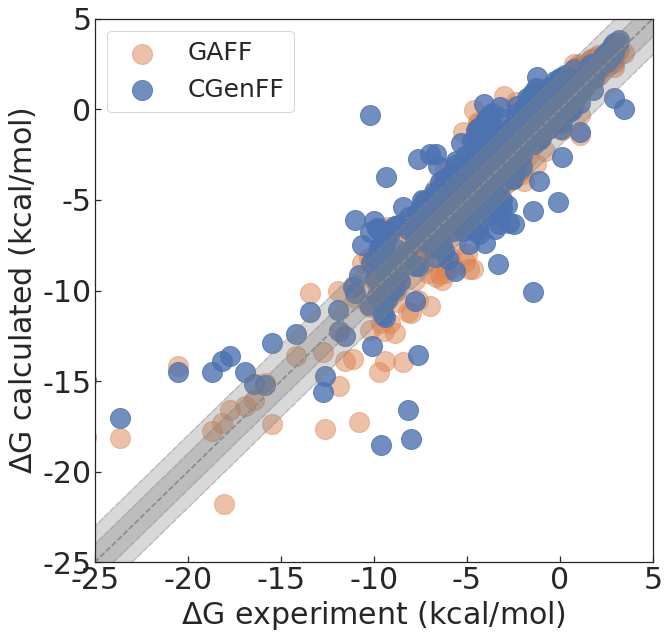

In [212]:
fig, axs = plt.subplots(1,1, figsize=(10, 10))
axs.scatter(data[" experimental value (kcal/mol)"],data[" Mobley group calculated value (GAFF) (kcal/mol)"], label = "GAFF", alpha = 0.5 ,color ="C1")
axs.scatter(data[" experimental value (kcal/mol)"],data["dG (TF)"], label = "CGenFF", alpha = 0.8, color = "C0")

plotting_grey_area(0, one_plot=True)
axs.set_xlim([-25,5])
axs.set_ylim([-25,5])
axs.set_xlabel("$\Delta$G experiment (kcal/mol)")
axs.set_ylabel("$\Delta$G calculated (kcal/mol)")  
plt.legend()